<a href="https://colab.research.google.com/github/Rushhaabhhh/ML-learning/blob/main/JamboreeCaseStudy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Jamboree Case Study

---


1. Import Libraries
2. Download Dataset from Google Drive
3. Load and Preview Data

In [ ]:
url = 'https://drive.google.com/file/d/1UCnSk_NN02jlzj0bbSZ_j-gdGUDDJxy4/view?usp=sharing'

import numpy as np
import pandas as pd
import seaborn as sns
import statsmodels.api as sm
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
!gdown 1UCnSk_NN02jlzj0bbSZ_j-gdGUDDJxy4

Downloading...
From: https://drive.google.com/uc?id=1UCnSk_NN02jlzj0bbSZ_j-gdGUDDJxy4
To: /content/Jamboree.csv
100% 16.2k/16.2k [00:00<00:00, 29.7MB/s]


In [ ]:
df = pd.read_csv('Jamboree.csv')
df.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [ ]:
df.columns

Index(['Serial No.', 'GRE Score', 'TOEFL Score', 'University Rating', 'SOP',
       'LOR ', 'CGPA', 'Research', 'Chance of Admit '],
      dtype='object')

## Data Preprocessing and Correlation Analysis
1. Scale the data
2. Check Pairwise Correlation
3. Generate Correlation Matrix
4. Plot heatmap

In [ ]:
X = df.drop(columns=['Chance of Admit '])
y = df['Chance of Admit ']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
corr_matrix = df.corr()

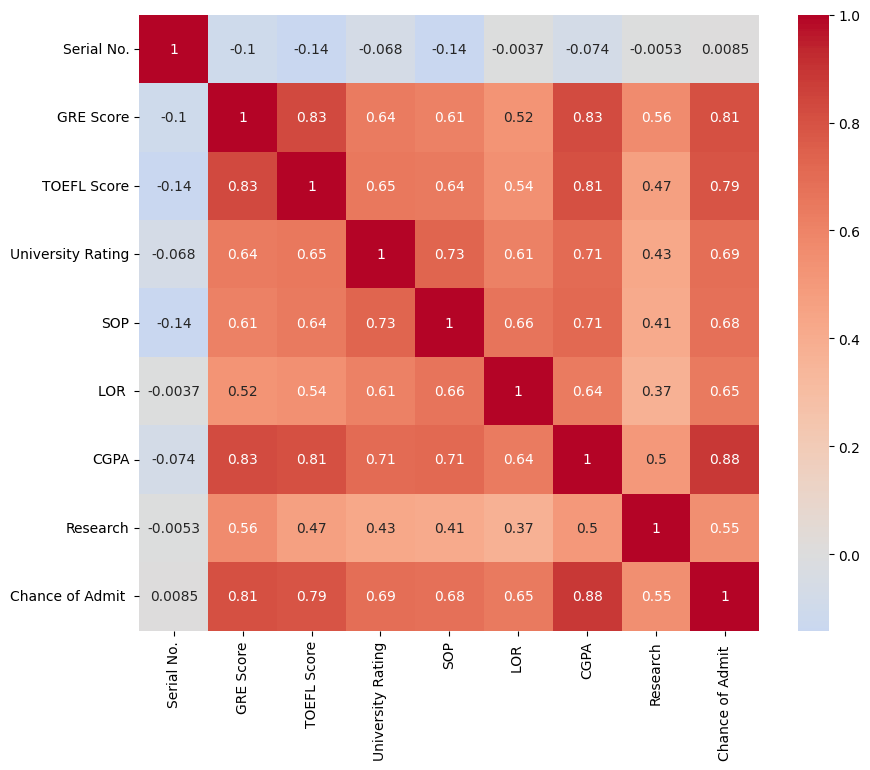

In [ ]:
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0)
plt.show()

## Linear Regression Analysis and Visualization

1. Estimate Target Variable :
  - Define a function estimate_chances() to calculate predictions using custom weights (w) and bias (b).
  - Visualize the actual data vs estimated target using scatter and line plots.

2. Interactive Parameter Testing :
  - Create a try_parameters() function to experiment with different weights and biases.
  - Overlay estimated predictions with actual data for comparison.

3. Simple Linear Regression :

  - Extract features (GRE Score) and target (Chance of Admit) for modeling.
  - Train a linear regression model using LinearRegression() and visualize actual vs predicted values.
  - Evaluate the model using the score() method.

4. Multiple Linear Regression :

  - Use multiple features (GRE Score, TOEFL Score, etc.) to predict the Chance of Admit.
  - Fit an Ordinary Least Squares (OLS) regression model and analyze the summary for insights.

5. Refinement of Features :

  - Remove less significant features and refit the OLS model to check for improvements in performance and interpretability.

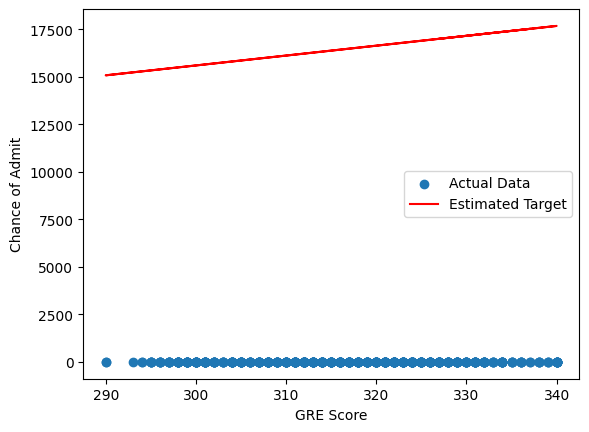

In [ ]:
df.columns = df.columns.str.strip()
df.columns = df.columns.str.lower()

def estimate_chances(feature, w, b):
    return w * feature + b

w = 5.2
b = 1

estimated_target = estimate_chances(df['gre score'], w, b)

target = df['chance of admit']
feature = df['gre score']

plt.scatter(feature, target, label='Actual Data')
plt.plot(feature, estimated_target, color='red', label='Estimated Target')
plt.xlabel('GRE Score')
plt.ylabel('Chance of Admit')
plt.legend()
plt.show()


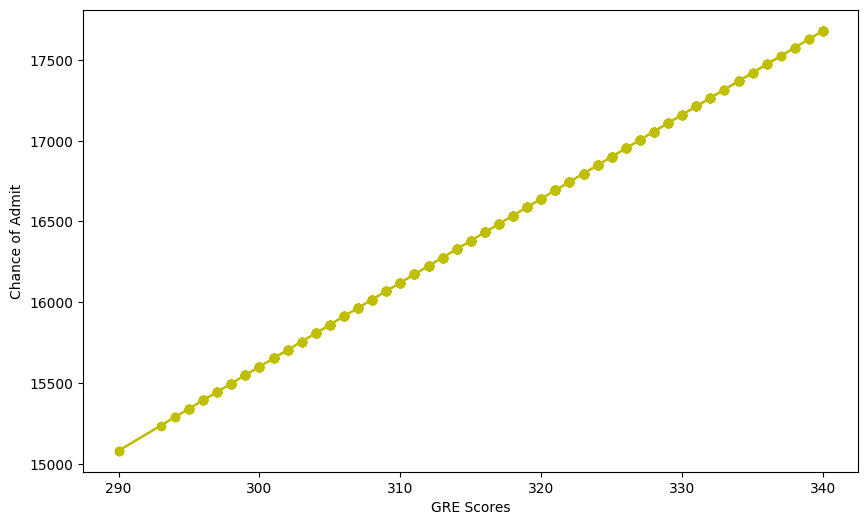

In [ ]:
plt.figure(figsize=(10,6))
plt.plot(feature, estimated_target, 'y-o');
plt.xlabel('GRE Scores');
plt.ylabel('Chance of Admit');

In [ ]:
def try_parameters(w, b):
    feature = df['gre score']
    target = df['chance of admit']

    estimated_chances = estimate_chances(feature, w, b)
    plt.figure(figsize=(10,6))
    plt.plot(feature, estimated_chances, 'r', alpha=0.9);
    plt.scatter(feature, target, s=8,alpha=0.8);
    plt.xlabel('GRE Scores');
    plt.ylabel('Chance of Admit')
    plt.legend(['Estimate', 'Actual']);

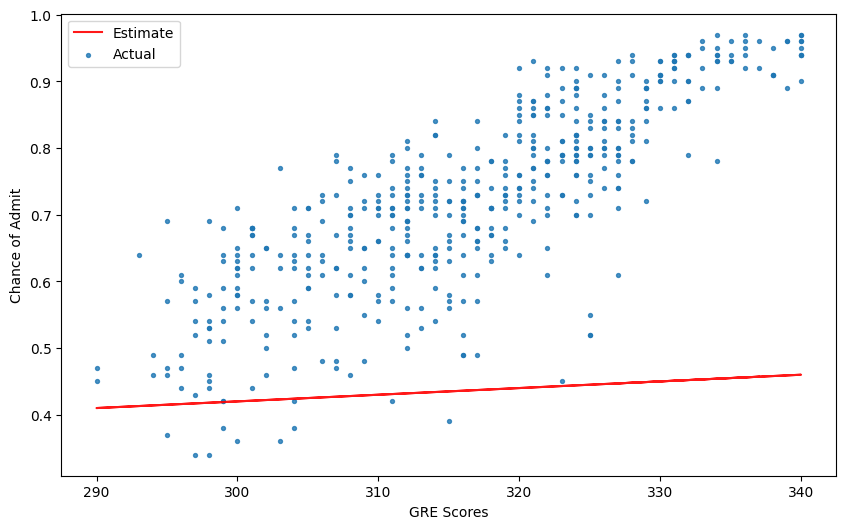

In [ ]:
try_parameters(0.001, 0.12)

In [ ]:
X = df['gre score'].values
Y = df['chance of admit'].values

model = LinearRegression()
type(model)

sklearn.linear_model._base.LinearRegression

In [ ]:
X = X.reshape(X.size, 1)
Y = Y.reshape(Y.size, 1)

model.fit(X, Y)

LinearRegression()

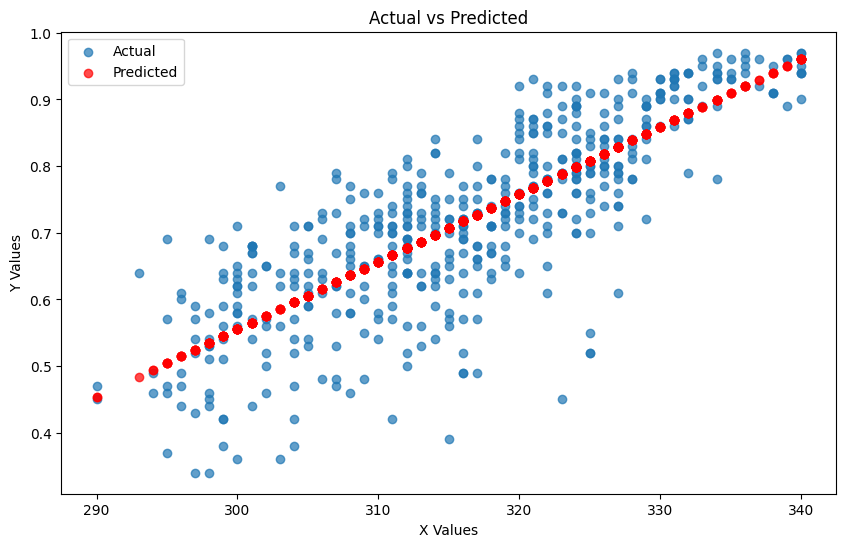

In [ ]:
y_hat = model.predict(X)
fig = plt.figure(figsize=(10,6))
plt.scatter(X, Y, label='Actual', alpha=0.7)
plt.scatter(X, y_hat, color='red', label='Predicted', alpha=0.7)
plt.xlabel('X Values')
plt.ylabel('Y Values')
plt.legend()
plt.title('Actual vs Predicted')
plt.show()

In [ ]:
model.score(X, Y)

0.656668152395709

In [ ]:
X = df[['gre score', 'toefl score', 'university rating', 'sop', 'lor', 'cgpa', 'research']]
Y = df['chance of admit']

X = sm.add_constant(X)
model = sm.OLS(Y, X).fit()
predictions = model.predict(X)

print_model = model.summary()
print(print_model)

                            OLS Regression Results                            
Dep. Variable:        chance of admit   R-squared:                       0.822
Model:                            OLS   Adj. R-squared:                  0.819
Method:                 Least Squares   F-statistic:                     324.4
Date:                Sun, 01 Dec 2024   Prob (F-statistic):          8.21e-180
Time:                        14:06:29   Log-Likelihood:                 701.38
No. Observations:                 500   AIC:                            -1387.
Df Residuals:                     492   BIC:                            -1353.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                -1.2757      0.10

In [ ]:
X = df[['gre score', 'toefl score', 'university rating', 'lor', 'cgpa', 'research']]
Y = df['chance of admit']

X = sm.add_constant(X)
model = sm.OLS(Y, X).fit()

print(model.summary())

                            OLS Regression Results                            
Dep. Variable:        chance of admit   R-squared:                       0.822
Model:                            OLS   Adj. R-squared:                  0.820
Method:                 Least Squares   F-statistic:                     379.1
Date:                Sun, 01 Dec 2024   Prob (F-statistic):          4.29e-181
Time:                        14:07:25   Log-Likelihood:                 701.32
No. Observations:                 500   AIC:                            -1389.
Df Residuals:                     493   BIC:                            -1359.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                -1.2800      0.10